# Exploratory Data Analysis 

### Roles to explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_PL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Poland')]

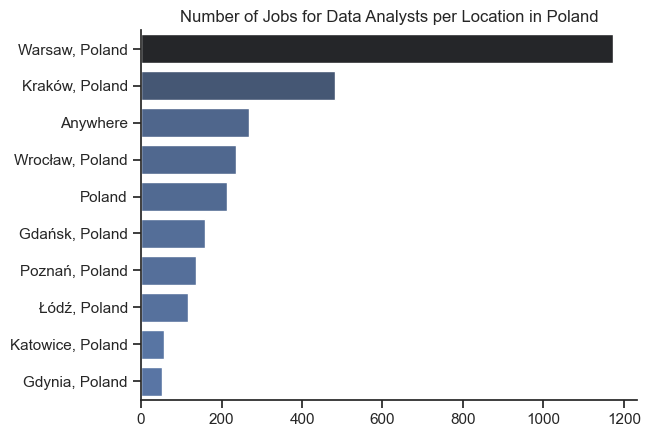

In [47]:
df_plot = df_DA_PL['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Jobs for Data Analysts per Location in Poland')
plt.show()


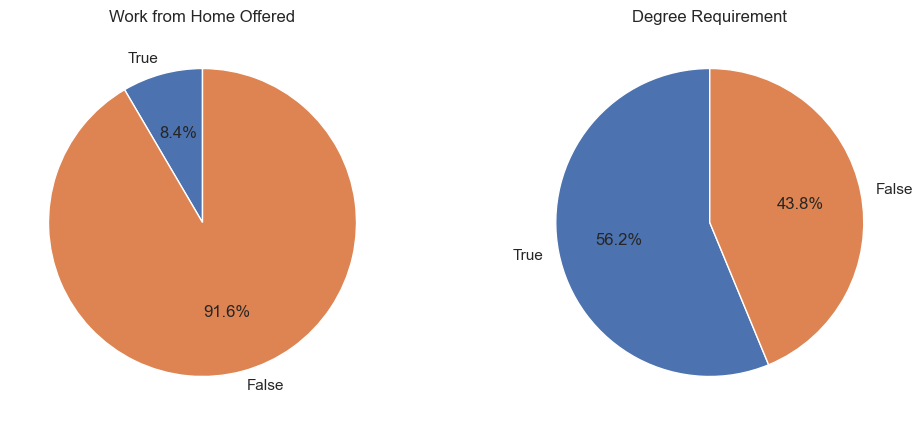

In [50]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_PL[column].value_counts().reindex([True, False], fill_value=0)
    ax[i].pie(counts, labels=['True', 'False'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


plt.show()

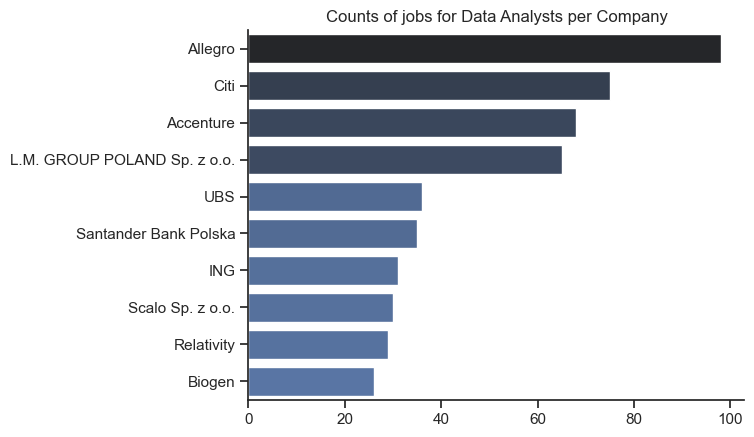

In [49]:
df_plot_2 = df_DA_PL['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot_2, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.title('Counts of jobs for Data Analysts per Company')
plt.show()